# UTS MODEL DEPLOYMENT

Arieldhipta Tarliman

2702234636

# Import Library

In [1]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report

# Read Dataset

In [2]:
df = pd.read_csv('Dataset_B_hotel.csv')

# Simple EDA

In [3]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0.0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0.0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0.0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0.0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0.0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     35368 non-null  object 
 6   required_car_parking_space            35005 non-null  float64
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [5]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,35005.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,34643.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.031281,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.447208,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.174079,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.158417,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.275000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


# Check Missing Values

In [6]:
null_count = df.isnull().sum()
missing_values = df.isnull().mean()*100

check_null = pd.DataFrame({
    'Null Count': null_count,
    'Null %': missing_values,
})

check_null.sort_values(by = 'Null %', ascending= False)

,Null Count,Null %
avg_price_per_room,1632,4.498966
required_car_parking_space,1270,3.501034
type_of_meal_plan,907,2.500345
Booking_ID,0,0.000000
arrival_date,0,0.000000
no_of_special_requests,0,0.000000
no_of_previous_bookings_not_canceled,0,0.000000
no_of_previous_cancellations,0,0.000000
repeated_guest,0,0.000000
market_segment_type,0,0.000000


In [7]:
def check_miss():
    print(f'Total missng values: {df.isna().sum().sum()}')
    print(f'Percentage missing value row: { df.isna().sum().sum() / len(df) * 100:.2f}%')

check_miss()

Total missng values: 3809
Percentage missing value row: 10.50%


The missing values each category are considerly low, but if combine the missing values affected 15% of the dataset which depends on how we preprocess could affect the result.

## Handling Missing Values

### avg_price_per_room

In [8]:
avg_price_by_room_type = df.groupby('room_type_reserved')['avg_price_per_room'].mean()
print("Rata-rata harga per kamar berdasarkan room_type_reserved:\n")
print(avg_price_by_room_type)


Rata-rata harga per kamar berdasarkan room_type_reserved:

room_type_reserved
Room_Type 1     95.931529
Room_Type 2     88.201400
Room_Type 3     73.678571
Room_Type 4    125.344486
Room_Type 5    124.350887
Room_Type 6    182.300174
Room_Type 7    154.196333
Name: avg_price_per_room, dtype: float64


Because column avg_price_per_room is already resebled price room each day we just need to group by each room type

In [9]:
# Fill missing values with the mean of their respective room type
df['avg_price_per_room'] = df.groupby('room_type_reserved')['avg_price_per_room'].transform(
    lambda x: x.fillna(x.mean())
)
check_miss()

Total missng values: 2177
Percentage missing value row: 6.00%


### required_car_parking_space

In [10]:
df['required_car_parking_space'] = df['required_car_parking_space'].fillna(df['required_car_parking_space'].mode()[0])

check_miss()

Total missng values: 907
Percentage missing value row: 2.50%


### type_of_meal_plan

In [11]:
df['type_of_meal_plan'] = df['type_of_meal_plan'].fillna(df['type_of_meal_plan'].mode()[0])

check_miss()

Total missng values: 0
Percentage missing value row: 0.00%


# Check Datatype

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  float64
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [13]:
# Convert to proper data types
df = df.astype({
    'Booking_ID': 'string',  
    'type_of_meal_plan': 'category',  
    'required_car_parking_space': 'int64',  
    'room_type_reserved': 'category',  
    'market_segment_type': 'category',  
    'repeated_guest': 'int64',  
    'avg_price_per_room': 'float32',  
    'no_of_special_requests': 'int64',  
    'booking_status': 'category'  
})

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   Booking_ID                            36275 non-null  string  
 1   no_of_adults                          36275 non-null  int64   
 2   no_of_children                        36275 non-null  int64   
 3   no_of_weekend_nights                  36275 non-null  int64   
 4   no_of_week_nights                     36275 non-null  int64   
 5   type_of_meal_plan                     36275 non-null  category
 6   required_car_parking_space            36275 non-null  int64   
 7   room_type_reserved                    36275 non-null  category
 8   lead_time                             36275 non-null  int64   
 9   arrival_year                          36275 non-null  int64   
 10  arrival_month                         36275 non-null  int64   
 11  ar

# Check Duplicated Values

In [15]:
df[df.duplicated()]

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status


In [16]:
df.duplicated().sum()

0

There are no duplicated values

# Check Unique Values

In [17]:
def show_unique_values(df, max_display=10):
    for column in df.columns:
        unique_values = df[column].unique()
        unique_count = len(unique_values)

        print(f"Column '{column}' has {unique_count} unique values.")

        try:
            unique_values_sorted = sorted(unique_values)
        except TypeError:
            unique_values_sorted = unique_values
            print("Note: Mixed data types, values not sorted.")

        # Display only the first 5 and last 5 unique values if count exceeds max_display
        if unique_count > max_display:
            display_values = list(unique_values_sorted[:5]) + ["..."] + list(unique_values_sorted[-5:])
            print(f"Sample unique values: {display_values}")
        else:
            print(f"Unique values: {list(unique_values_sorted)}")
        print("-" * 50)

# Call the function
show_unique_values(df)


Column 'Booking_ID' has 36275 unique values.
Sample unique values: ['INN00001', 'INN00002', 'INN00003', 'INN00004', 'INN00005', '...', 'INN36271', 'INN36272', 'INN36273', 'INN36274', 'INN36275']
--------------------------------------------------
Column 'no_of_adults' has 5 unique values.
Unique values: [0, 1, 2, 3, 4]
--------------------------------------------------
Column 'no_of_children' has 6 unique values.
Unique values: [0, 1, 2, 3, 9, 10]
--------------------------------------------------
Column 'no_of_weekend_nights' has 8 unique values.
Unique values: [0, 1, 2, 3, 4, 5, 6, 7]
--------------------------------------------------
Column 'no_of_week_nights' has 18 unique values.
Sample unique values: [0, 1, 2, 3, 4, '...', 13, 14, 15, 16, 17]
--------------------------------------------------
Column 'type_of_meal_plan' has 4 unique values.
Unique values: ['Meal Plan 1', 'Meal Plan 2', 'Meal Plan 3', 'Not Selected']
--------------------------------------------------
Column 'require

In [18]:
for col in df.columns:
    value_counts = df[col].value_counts().sort_values(ascending=False) 
    value_counts = value_counts.sort_index().sort_values(ascending=False, kind='mergesort')
    print(f"Column: {col}")
    print(f"{value_counts}\n")

Column: Booking_ID
Booking_ID
INN00001    1
INN00002    1
INN00003    1
INN00004    1
INN00005    1
           ..
INN36271    1
INN36272    1
INN36273    1
INN36274    1
INN36275    1
Name: count, Length: 36275, dtype: Int64

Column: no_of_adults
no_of_adults
2    26108
1     7695
3     2317
0      139
4       16
Name: count, dtype: int64

Column: no_of_children
no_of_children
0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: count, dtype: int64

Column: no_of_weekend_nights
no_of_weekend_nights
0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: count, dtype: int64

Column: no_of_week_nights
no_of_week_nights
2     11444
1      9488
3      7839
4      2990
0      2387
5      1614
6       189
7       113
8        62
10       62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: count, dtype: int64

Column: type_of_meal_plan
type_of_meal_plan
Meal Plan 1     28064
Not

There are some probklem with the unique valeus for example
- no_of_week_nights are the number for each week but the dataset shows some of the booking id has more than 5 night which is impossible because 1 week working day is only 5 night
- no_of_weekend_nights also have the same problem where weekend only have 2 night but the values vary for more than 3.

# Plotting

In [19]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [20]:
numerical_columns = ['no_of_weekend_nights','no_of_week_nights','lead_time', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room']
categorical_columns = ['no_of_adults','no_of_children',  'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved','arrival_year','arrival_month','arrival_date','market_segment_type','repeated_guest','no_of_special_requests','booking_status']


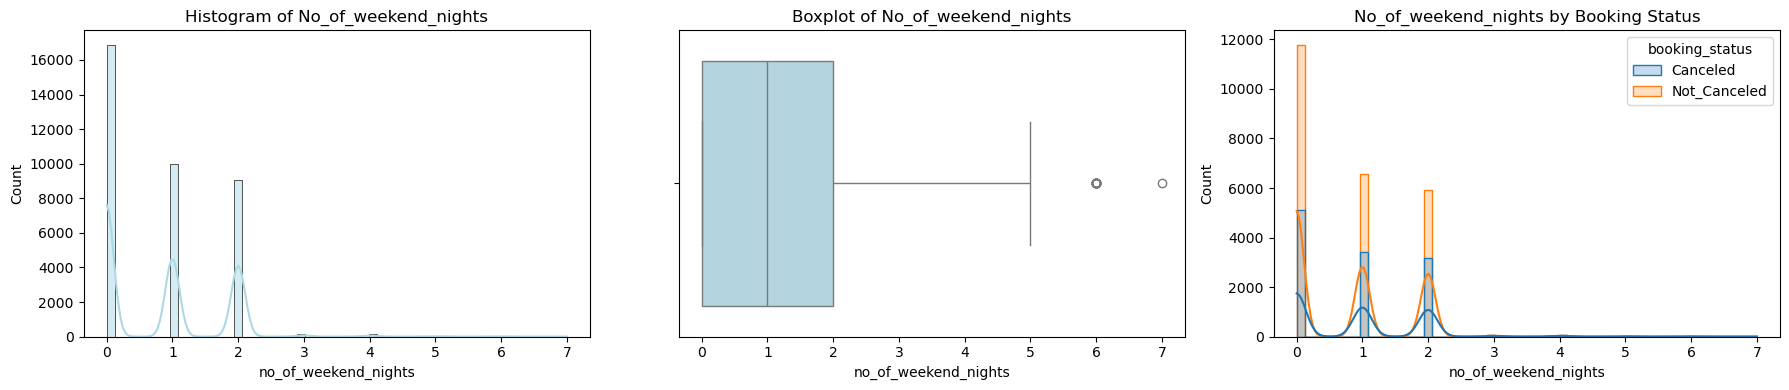

no_of_weekend_nights - Skewness: 0.74
no_of_weekend_nights - Kurtosis: 0.30


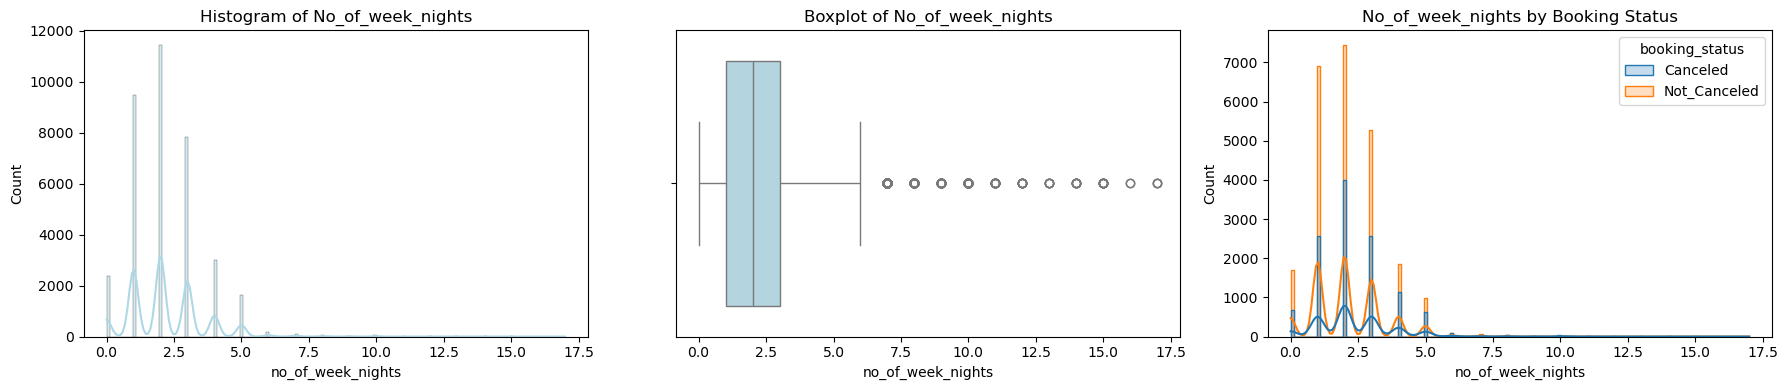

no_of_week_nights - Skewness: 1.60
no_of_week_nights - Kurtosis: 7.80


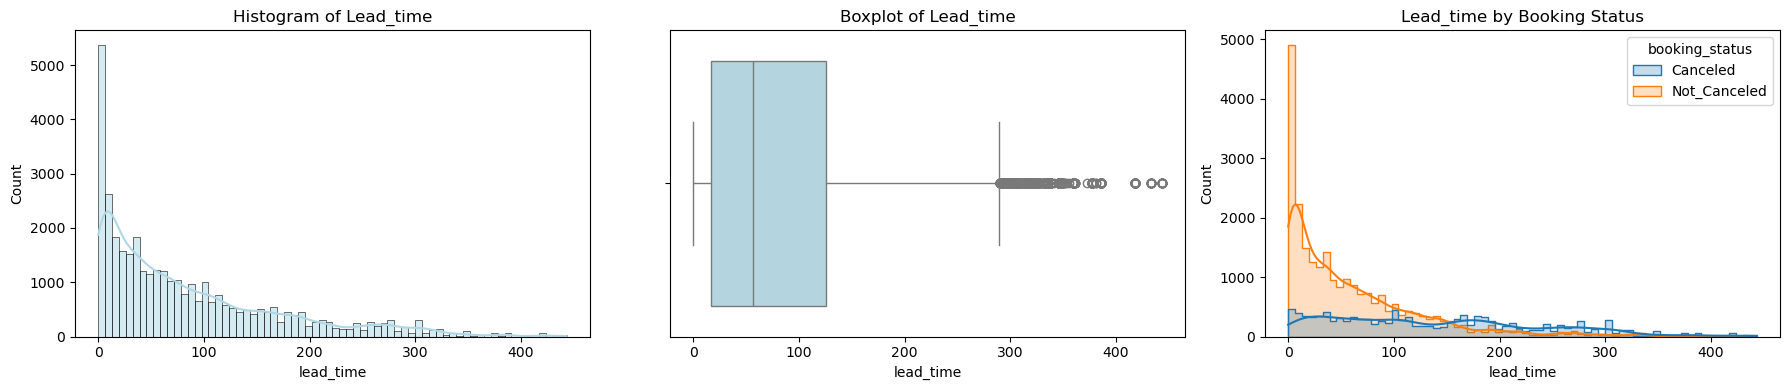

lead_time - Skewness: 1.29
lead_time - Kurtosis: 1.18


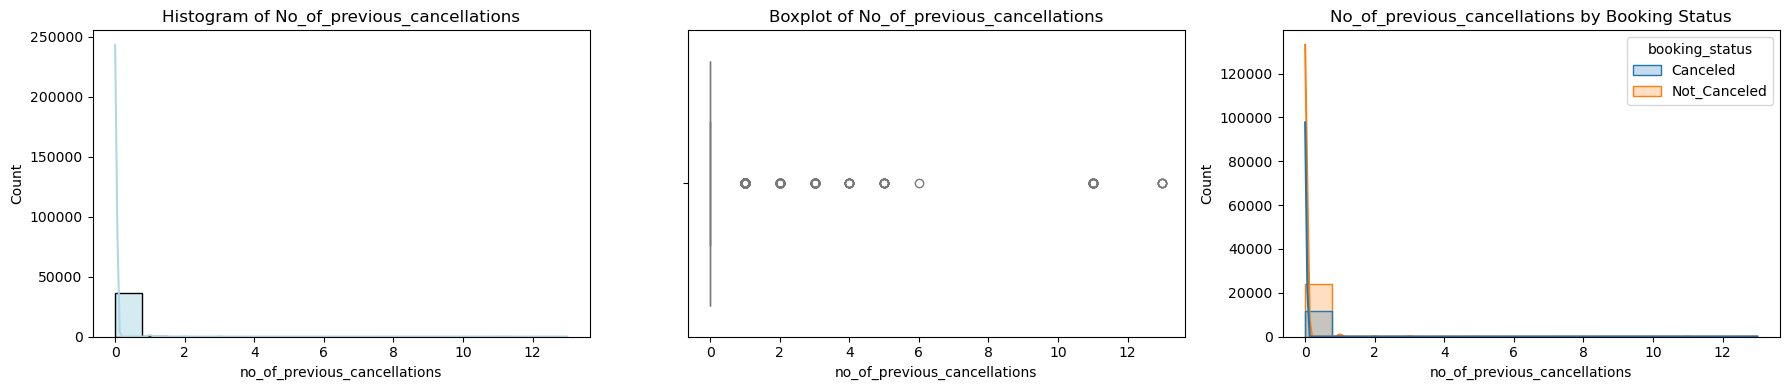

no_of_previous_cancellations - Skewness: 25.20
no_of_previous_cancellations - Kurtosis: 732.74


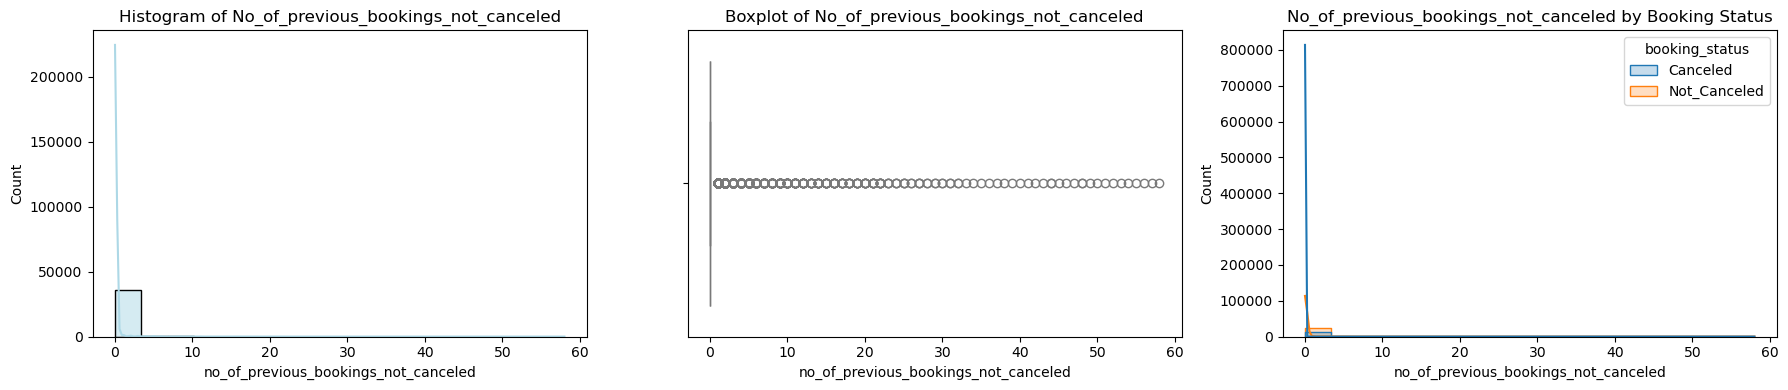

no_of_previous_bookings_not_canceled - Skewness: 19.25
no_of_previous_bookings_not_canceled - Kurtosis: 457.38


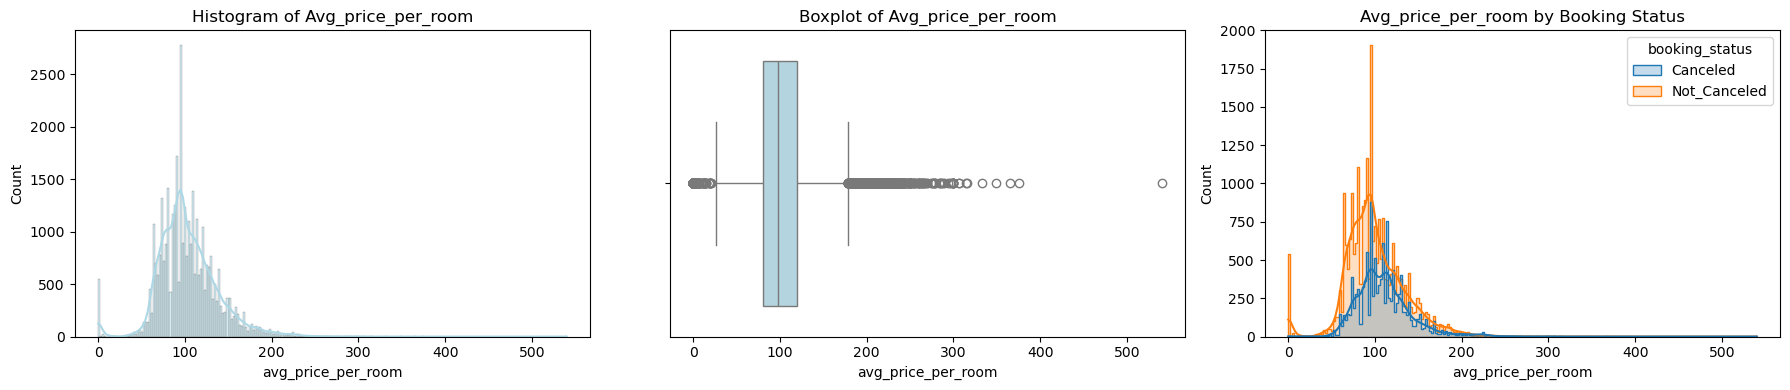

avg_price_per_room - Skewness: 0.69
avg_price_per_room - Kurtosis: 3.37


In [25]:
for i, var in enumerate(numerical_columns, 1):
    fig, axes = plt.subplots(1, 3, figsize=(18, 4))

    # Plot 1: Histogram
    sns.histplot(df[var], ax=axes[0], color='lightblue', kde=True)
    axes[0].set_title(f"Histogram of {var.capitalize()}")

    # Plot 2: Boxplot
    sns.boxplot(x=df[var], ax=axes[1], color='lightblue')
    axes[1].set_title(f"Boxplot of {var.capitalize()}")

    # Plot 3: Distribution by Booking Status
    sns.histplot(data=df, x=var, hue='booking_status', ax=axes[2], kde=True, element='step')
    axes[2].set_title(f"{var.capitalize()} by Booking Status")

    plt.tight_layout()
    plt.show()

    print(f'{var} - Skewness: {df[var].skew():.2f}')
    print(f'{var} - Kurtosis: {df[var].kurt():.2f}')


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13848\4137182829.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13848\4137182829.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)


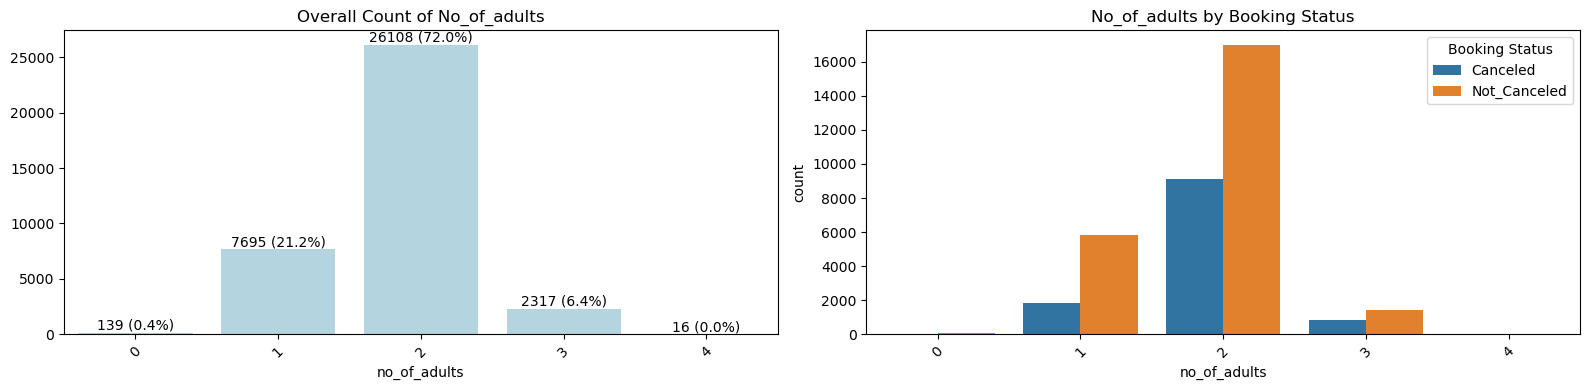

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13848\4137182829.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13848\4137182829.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)


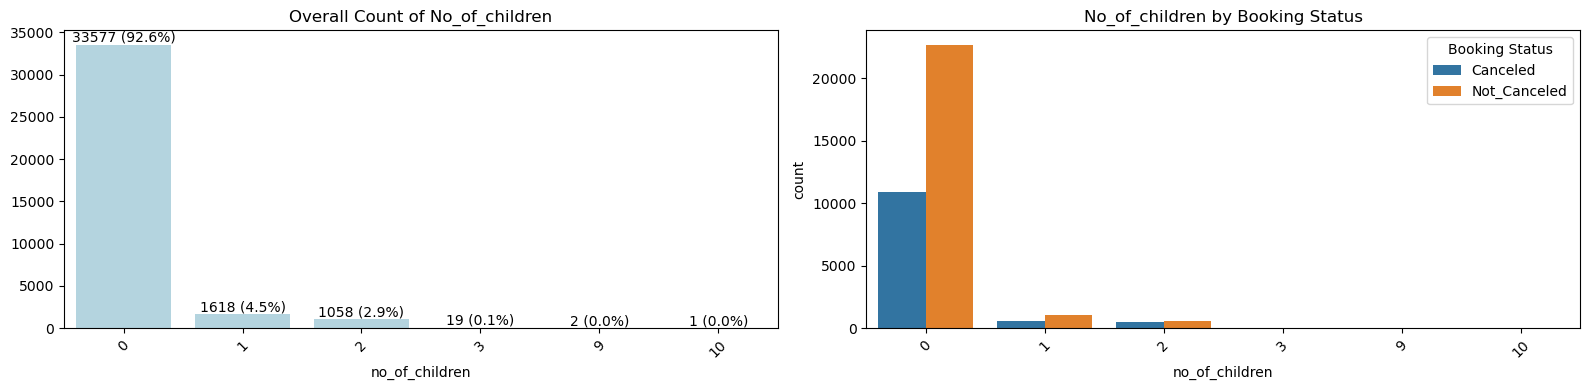

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13848\4137182829.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13848\4137182829.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)


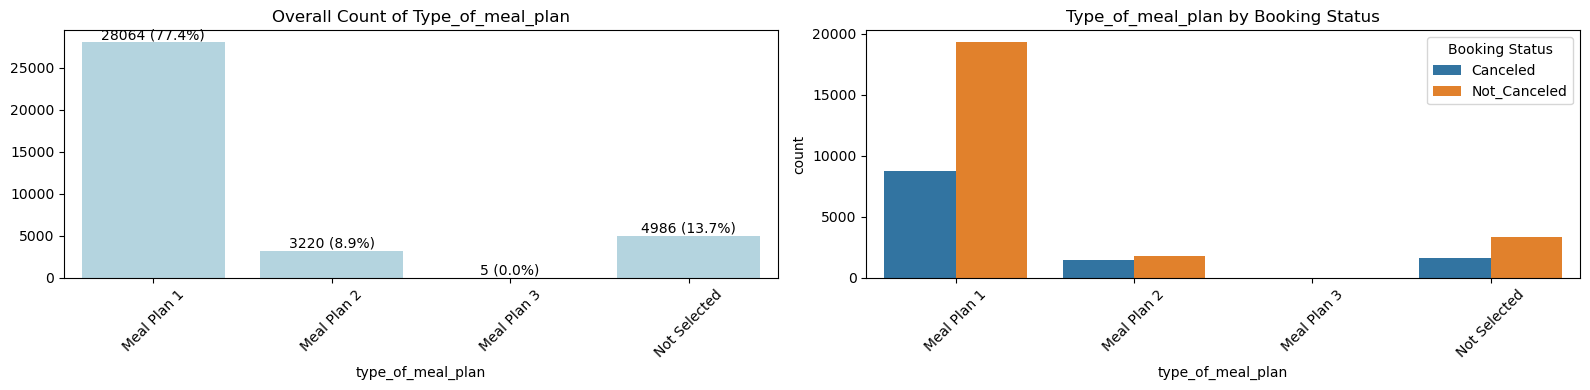

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13848\4137182829.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13848\4137182829.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)


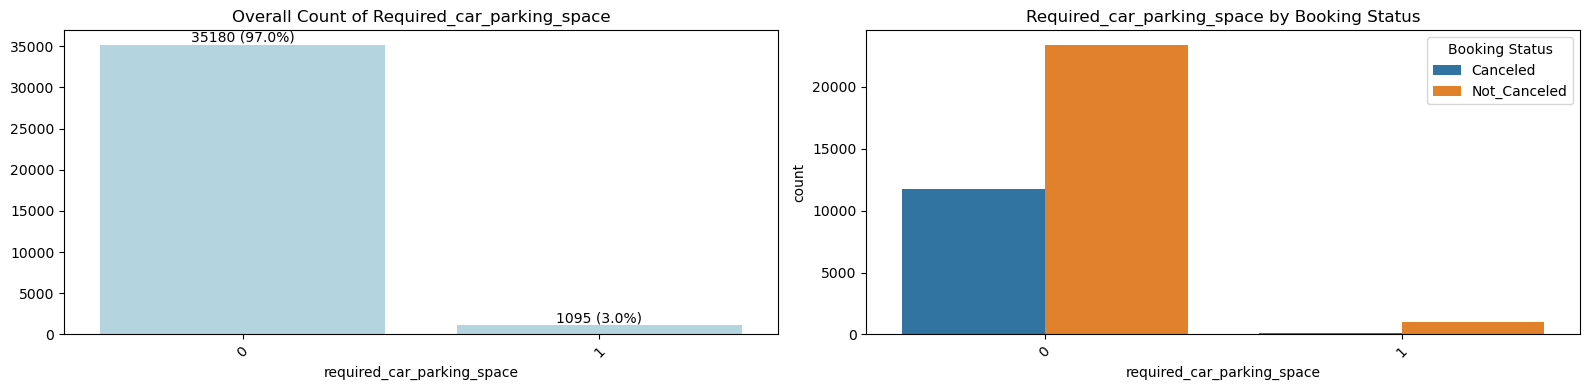

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13848\4137182829.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13848\4137182829.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)


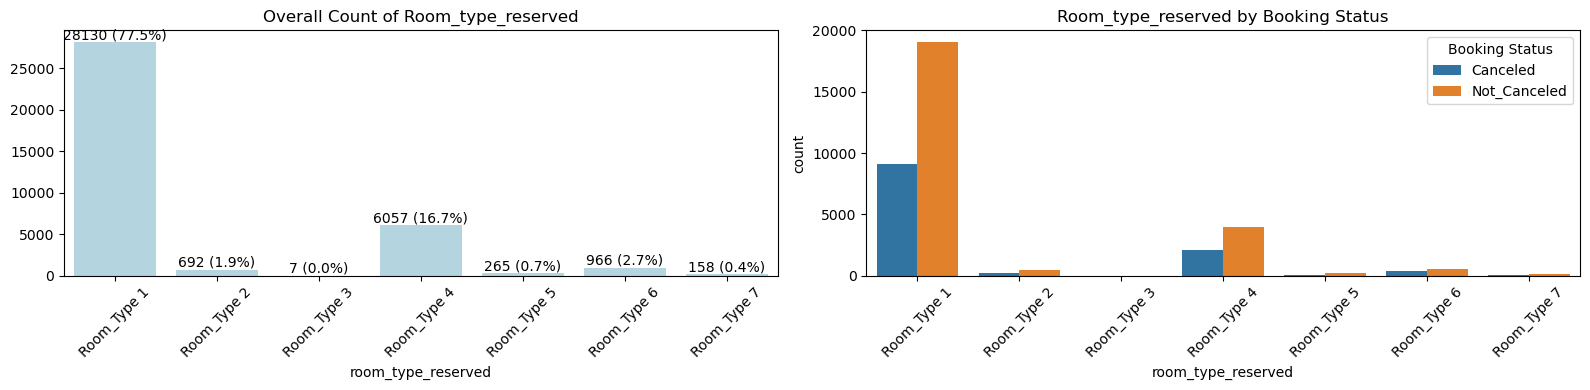

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13848\4137182829.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13848\4137182829.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)


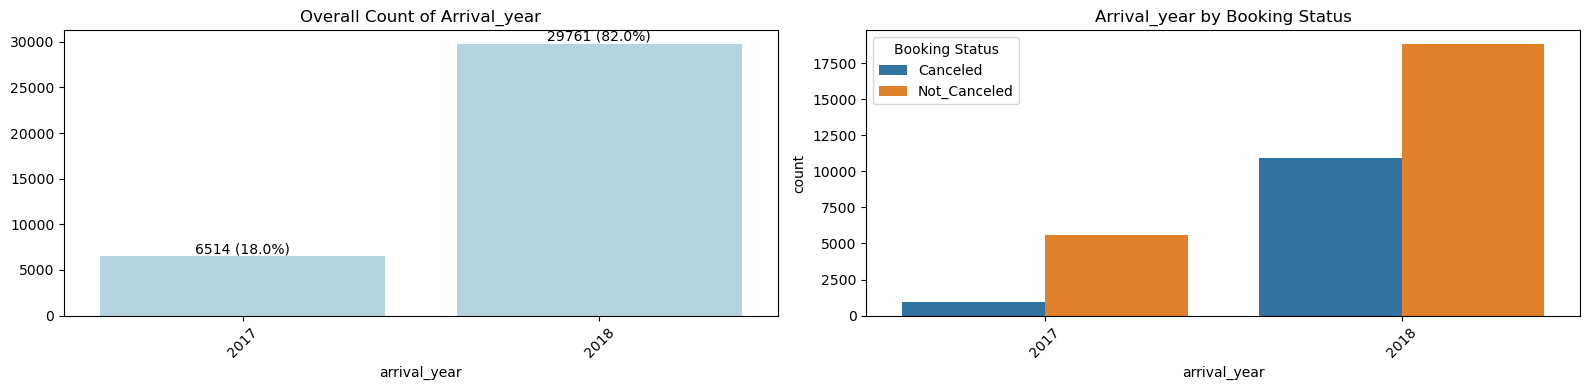

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13848\4137182829.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13848\4137182829.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)


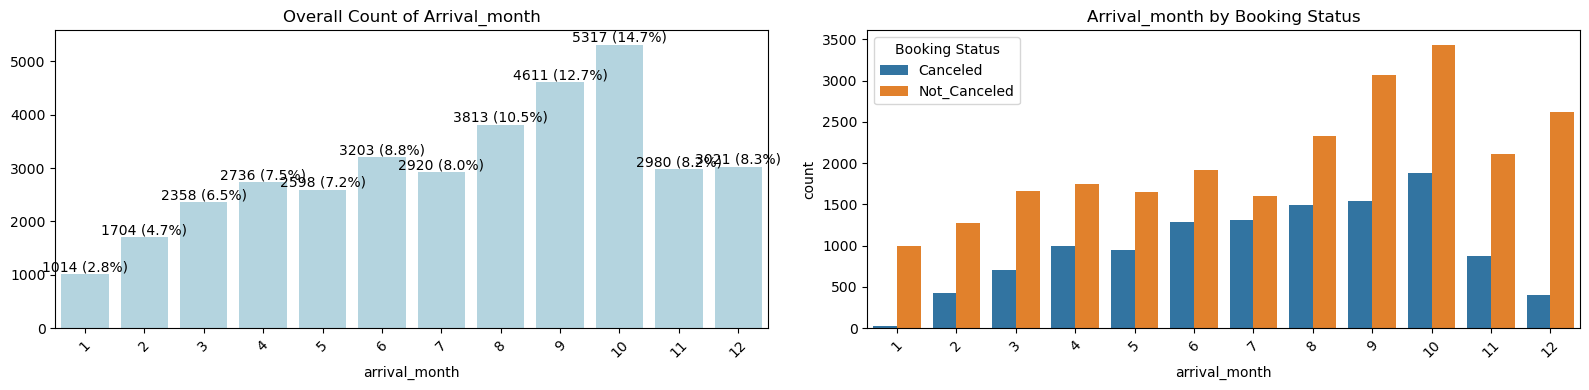

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13848\4137182829.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13848\4137182829.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)


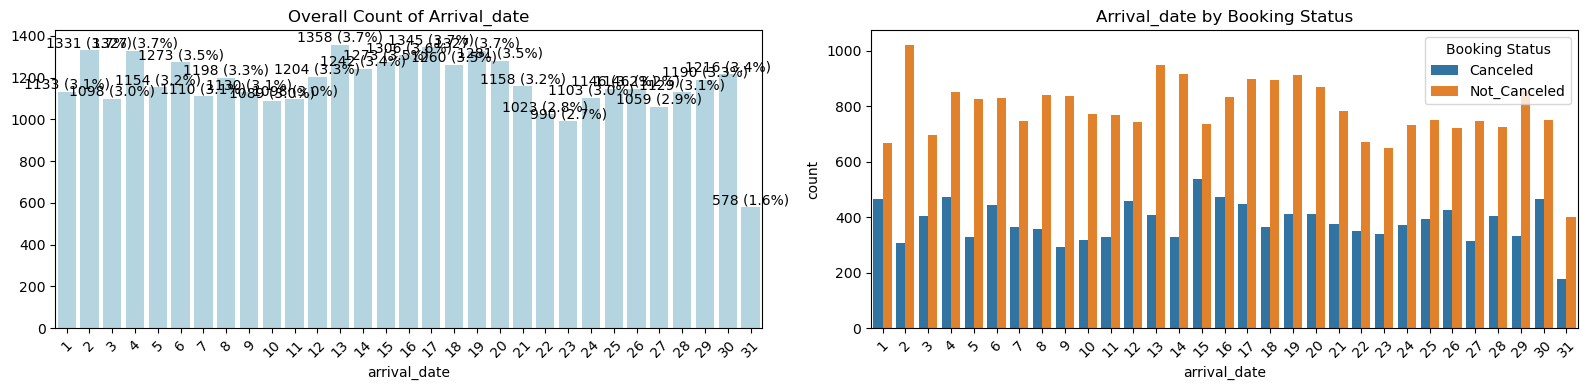

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13848\4137182829.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13848\4137182829.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)


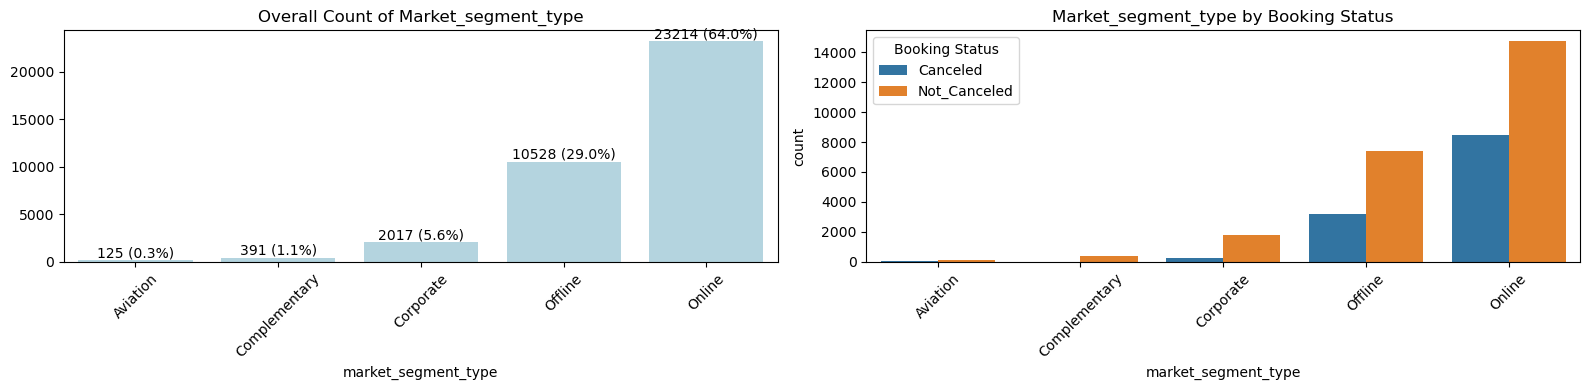

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13848\4137182829.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13848\4137182829.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)


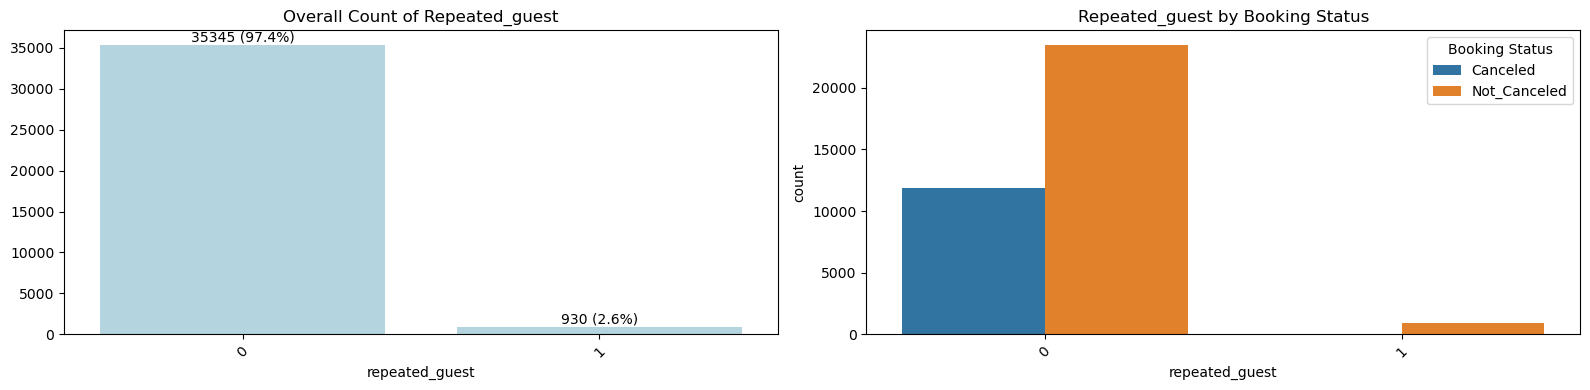

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13848\4137182829.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13848\4137182829.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)


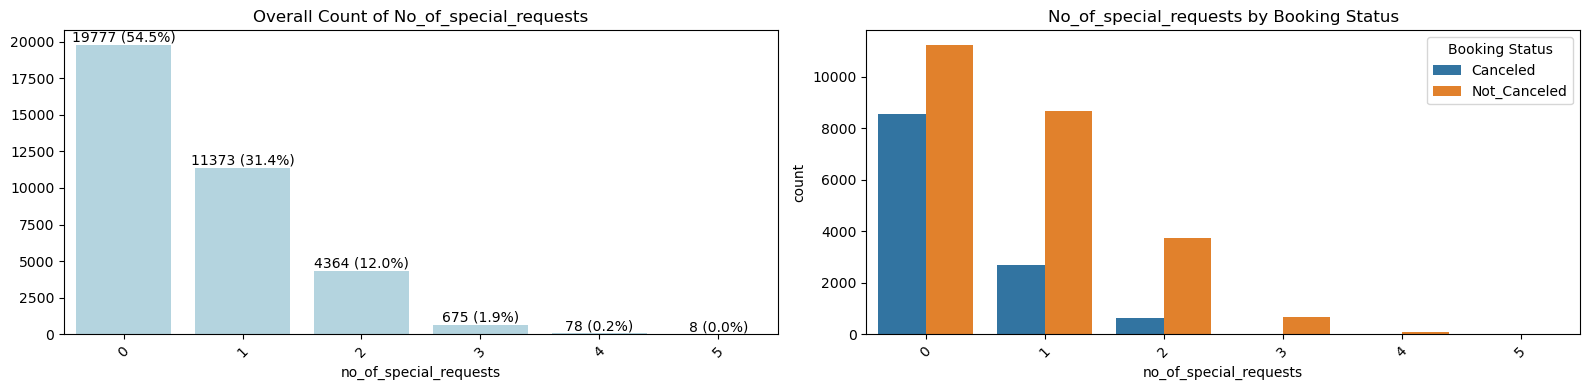

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13848\4137182829.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)


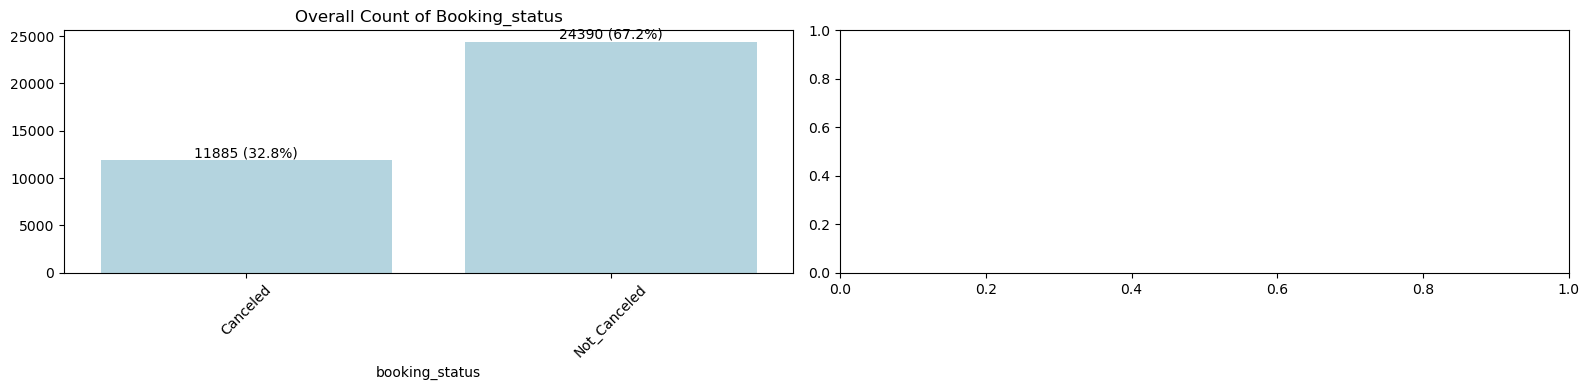

In [ ]:
for var in categorical_columns:
    # Check if the current variable is 'Booking_status'
    if var == 'Booking_status':
        # Only one axis for 'Booking_status'
        fig, axes = plt.subplots(1, 1, figsize=(8, 4))
        axes = [axes]  # Make it iterable for consistency
    else:
        # Two subplots for other categorical variables
        fig, axes = plt.subplots(1, 2, figsize=(16, 4))

    # === Left Plot: Overall Count ===
    value_counts = df[var].value_counts()
    total = len(df[var])

    sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[0], color='lightblue')
    axes[0].set_title(f"Overall Count of {var.capitalize()}")
    
    # Set x-ticks explicitly to avoid warning
    axes[0].set_xticks(range(len(value_counts.index)))
    axes[0].set_xticklabels(value_counts.index, rotation=45)

    # Add count and % annotations
    for p in axes[0].patches:
        count = int(p.get_height())
        percentage = f"{(count / total) * 100:.1f}%"
        axes[0].text(p.get_x() + p.get_width() / 2, 
                     p.get_height() + 0.5, 
                     f"{count} ({percentage})", 
                     ha='center', va='bottom', fontsize=10)

    # === Right Plot: Grouped by Booking_status ===
    if var != 'booking_status':  # Skip this part for 'booking_status'
        grouped = df.groupby([var, 'booking_status'], observed=False).size().reset_index(name='count')
        sns.barplot(x=var, y='count', hue='booking_status', data=grouped, ax=axes[1])
        axes[1].set_title(f"{var.capitalize()} by Booking Status")
        
        # Set x-ticks explicitly to avoid warning
        axes[1].set_xticks(range(len(grouped[var].unique())))
        axes[1].set_xticklabels(grouped[var].unique(), rotation=45)
        axes[1].legend(title='Booking Status')

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()


# Correlation

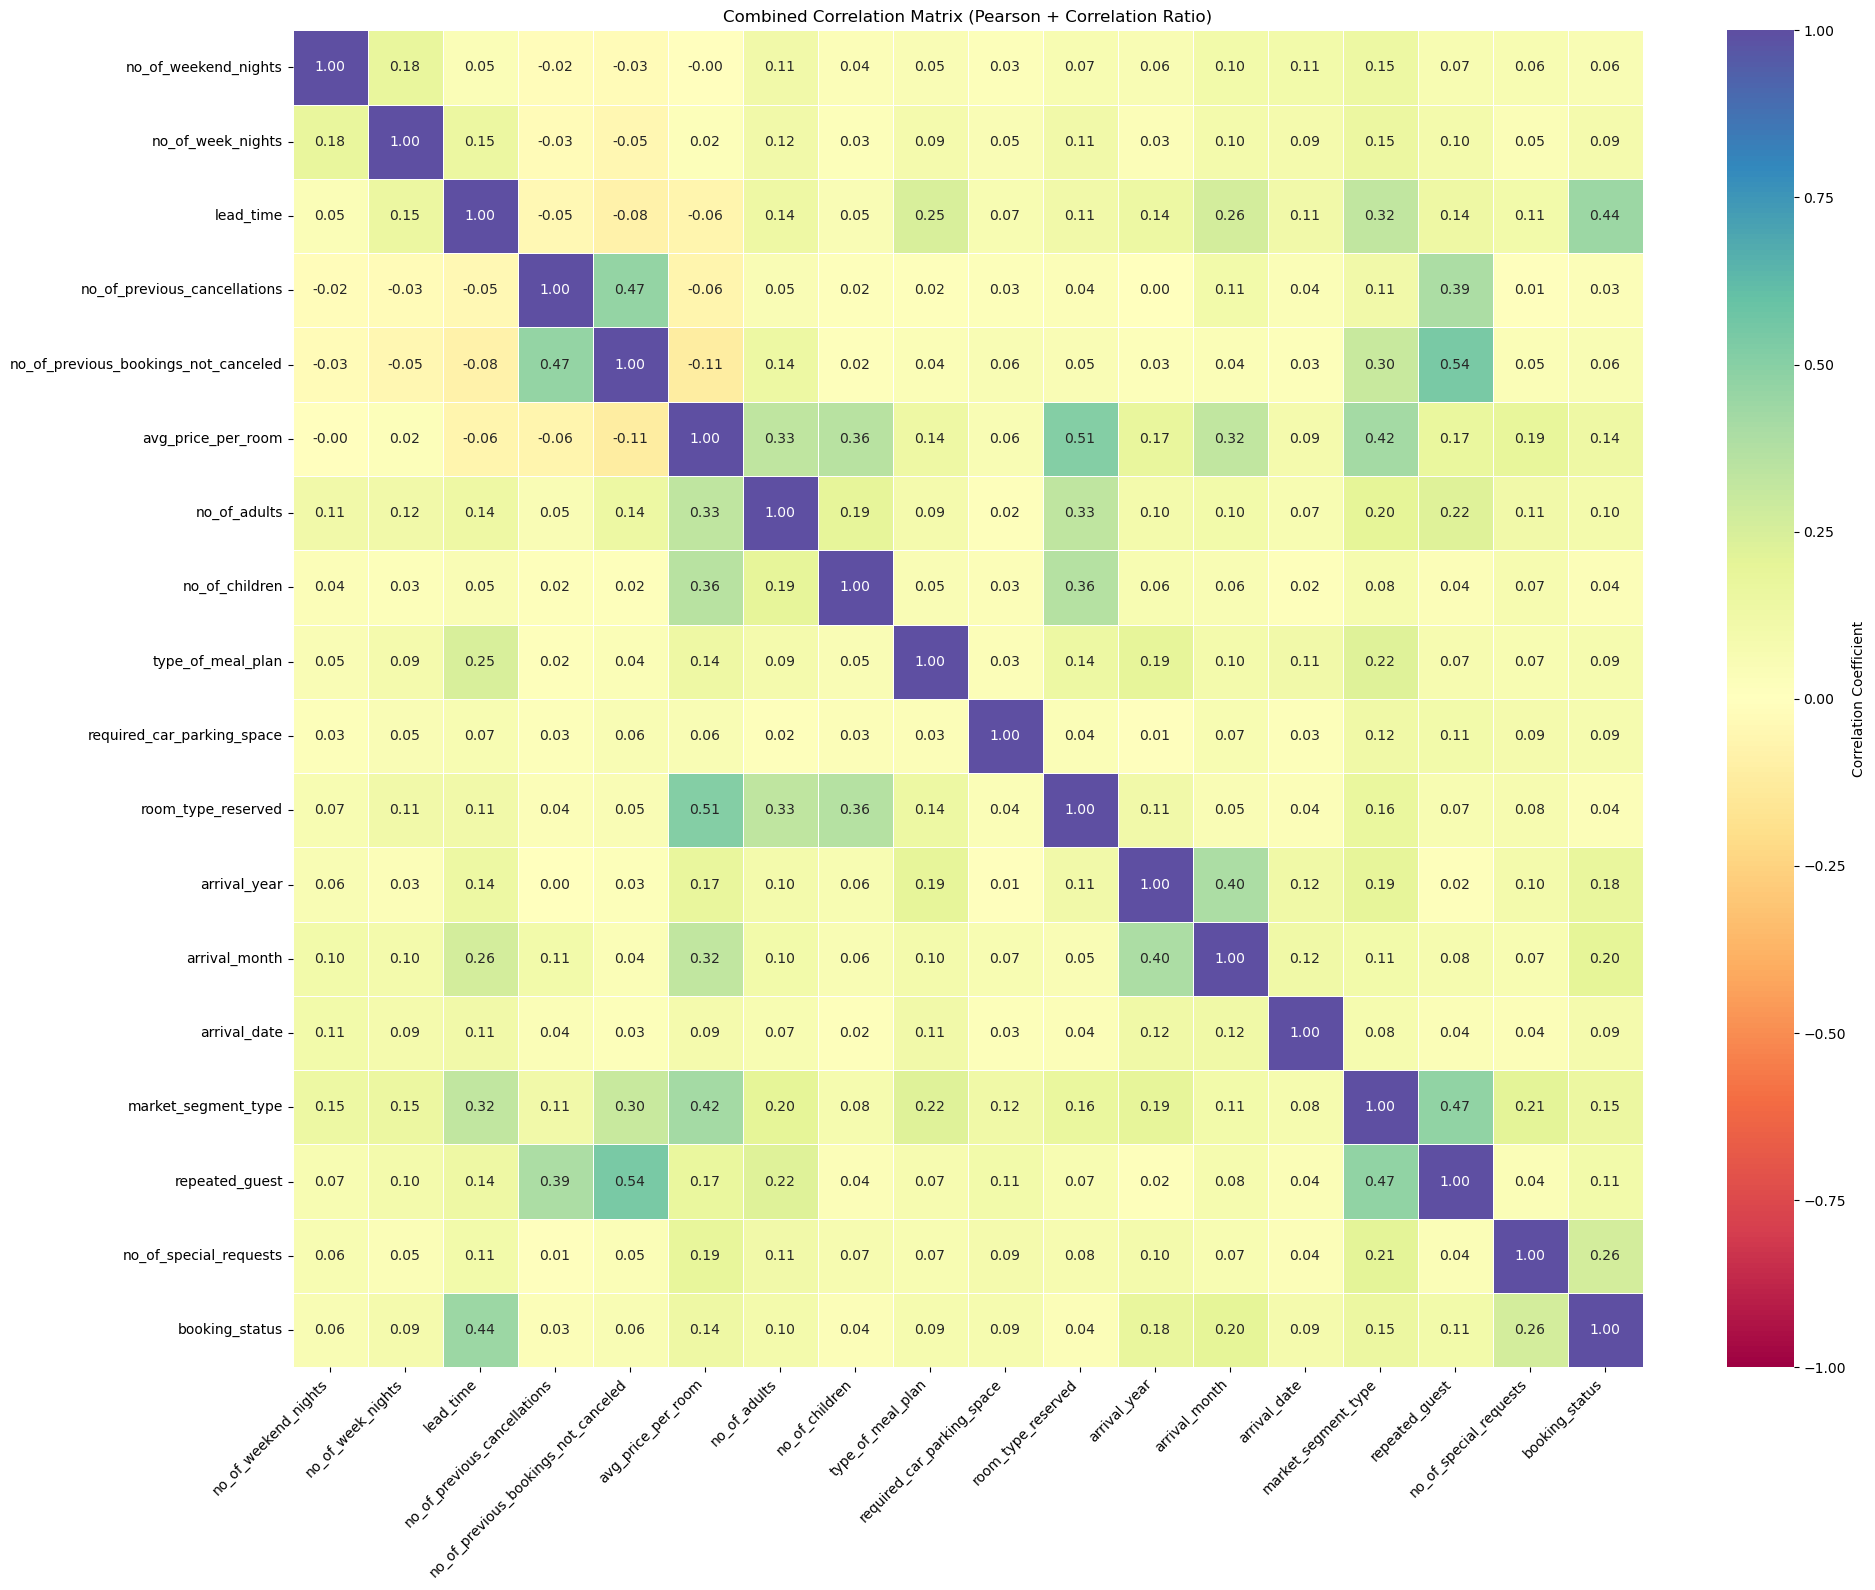

In [23]:
# Create empty correlation matrix
all_columns = numerical_columns + categorical_columns
corr_matrix = pd.DataFrame(index=all_columns, columns=all_columns)

def correlation_ratio(categories, measurements):
    """Calculate correlation ratio between categorical and continuous variables."""
    categories = pd.Series(categories).astype('category').cat.codes
    y_avg = measurements.mean()
    class_avgs = measurements.groupby(categories).mean()
    class_counts = measurements.groupby(categories).count()
    numerator = (class_counts * (class_avgs - y_avg)**2).sum()
    denominator = ((measurements - y_avg)**2).sum()
    return np.sqrt(numerator / denominator) if denominator != 0 else 0

# Fill categorical-categorical with Cramer's V
import scipy.stats as ss

def cramers_v(x, y):
    """Calculate Cramér's V statistic for categorical-categorical association."""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape

    # Bias correction
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1))) if min((kcorr-1), (rcorr-1)) > 0 else 0

# Fill numerical-numerical with Pearson correlation
for num1 in numerical_columns:
    for num2 in numerical_columns:
        corr, _ = pearsonr(df[num1].dropna(), df[num2].dropna())
        corr_matrix.loc[num1, num2] = corr

# Fill numerical-categorical with correlation ratio
for num in numerical_columns:
    for cat in categorical_columns:
        eta = correlation_ratio(df[cat], df[num].dropna())
        corr_matrix.loc[num, cat] = eta
        corr_matrix.loc[cat, num] = eta  # Symmetric

# Fill categorical-categorical with Cramér's V
for cat1 in categorical_columns:
    for cat2 in categorical_columns:
        v = cramers_v(df[cat1], df[cat2])
        corr_matrix.loc[cat1, cat2] = v


# Convert to float and handle diagonal
corr_matrix = corr_matrix.astype(float)
np.fill_diagonal(corr_matrix.values, 1)

# Plot heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, 
            annot=True, 
            fmt=".2f", 
            cmap='Spectral', 
            center=0,
            vmin=-1, 
            vmax=1,
            linewidths=0.5,
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Combined Correlation Matrix (Pearson + Correlation Ratio)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Data Preprocessing

## Feature Engineering

In [24]:
df['total_nights'] = df.no_of_weekend_nights + df.no_of_week_nights
df['total_guests'] = df.no_of_adults + df.no_of_children

In [25]:
# # Mapping bulan ke nama musim
# season_map = {
#     12: 'Winter', 1: 'Winter', 2: 'Winter',
#     3: 'Spring', 4: 'Spring', 5: 'Spring',
#     6: 'Summer', 7: 'Summer', 8: 'Summer',
#     9: 'Fall', 10: 'Fall', 11: 'Fall'
# }

# # Terapkan mapping
# df['arrival_season'] = df['arrival_month'].map(season_map)

## Feature Encoding

In [26]:
meal_plan_mapping = {
    'Meal Plan 1': 0,
    'Meal Plan 2': 1,
    'Meal Plan 3': 2,
    'Not Selected': 3
}

room_type_mapping = {
    'Room_Type 1': 0,
    'Room_Type 2': 1,
    'Room_Type 3': 2,
    'Room_Type 4': 3,
    'Room_Type 5': 4,
    'Room_Type 6': 5,
    'Room_Type 7': 6
}

market_segment_mapping = {
    'Aviation': 0,  
    'Complementary': 1,
    'Corporate': 2,
    'Offline': 3,
    'Online': 4
}
# arrival_season_mapping = {
#     'Winter': 0, 
#     'Spring': 1, 
#     'Summer': 2, 
#     'Fall': 3
# }

# Apply mappings using .map()
df['type_of_meal_plan'] = df['type_of_meal_plan'].map(meal_plan_mapping)
df['room_type_reserved'] = df['room_type_reserved'].map(room_type_mapping)
df['market_segment_type'] = df['market_segment_type'].map(market_segment_mapping)
# df['arrival_season'] = df['arrival_season'].map(arrival_season_mapping)
df['booking_status'] = df['booking_status'].map({'Not_Canceled': 0, 'Canceled': 1})

In [27]:
df.drop(columns=[
    'Booking_ID','no_of_weekend_nights','no_of_week_nights','no_of_adults','no_of_children'
], inplace=True)

# Scaling

Tree-based models like Random Forest and XGBoboost generally do not require feature scaling. Both Random Forest and XGBoost internally handle feature importance without bias towards higher-magnitude features.

# Modelling

## Random Forest

Feature Selection

In [28]:
x = df.drop('booking_status', axis=1)
y = df['booking_status']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

# Step 1: Baseline Random Forest to get feature importances
rf_selection = RandomForestClassifier(random_state=42)
rf_selection.fit(X_train, y_train)

# Get feature importances and select top N features
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_selection.feature_importances_
}).sort_values('Importance', ascending=False)

# Select top 10 features (adjust as needed)
selected_features = feature_importances['Feature'].head(10).tolist()
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

print("Selected Features:", selected_features)

Selected Features: ['lead_time', 'avg_price_per_room', 'arrival_date', 'no_of_special_requests', 'arrival_month', 'total_nights', 'market_segment_type', 'total_guests', 'arrival_year', 'type_of_meal_plan']


Base Line Model

In [29]:
# Step 2: Baseline model with selected features
rf_baseline_selected = RandomForestClassifier(random_state=42)
rf_baseline_selected.fit(X_train_selected, y_train)

# Evaluate
y_pred = rf_baseline_selected.predict(X_test_selected)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      4839
           1       0.87      0.82      0.84      2416

    accuracy                           0.90      7255
   macro avg       0.89      0.88      0.88      7255
weighted avg       0.90      0.90      0.90      7255



Fine Tune Model

In [30]:
param_grid = {
    'n_estimators': [100, 150,200,250, 300, 500],          # Number of trees (larger range)
    'max_depth': [None,10, 50, 70, 100,150,200],            # Depth of trees (wider range)
    'min_samples_split': [2, 5, 10, 15, 20],              # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4, 8],                 # Minimum samples at a leaf node
    'max_features': ['sqrt', 'log2', None, 0.5],      # Features to consider for best split
    'bootstrap': [True, False],                # Whether to bootstrap samples
    'class_weight': [None, 'balanced']         # Helpful for imbalanced data
}

In [31]:
random_search_rf = RandomizedSearchCV(
    estimator=rf_baseline_selected,
    param_distributions=param_grid,
    n_iter=100,  # try 100 random combinations
    cv=3,
    scoring='f1',  
    verbose=2,
    n_jobs=-1
)
random_search_rf.fit(X_train_selected,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': [None, 'balanced'],
                                        'max_depth': [None, 10, 50, 70, 100,
                                                      150, 200],
                                        'max_features': ['sqrt', 'log2', None,
                                                         0.5],
                                        'min_samples_leaf': [1, 2, 4, 8],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300, 500]},
                   scoring='f1', verbose=2)

In [32]:
# Best model
best_rf = random_search_rf.best_estimator_
print("Best Parameters:", random_search_rf.best_params_)

# Evaluate tuned model
y_pred_tuned = best_rf.predict(X_test_selected)
print(classification_report(y_test, y_pred_tuned))


Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 100, 'class_weight': 'balanced', 'bootstrap': True}
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      4839
           1       0.85      0.83      0.84      2416

    accuracy                           0.90      7255
   macro avg       0.89      0.88      0.88      7255
weighted avg       0.90      0.90      0.90      7255



## XGBoost

Feature Selection

In [33]:
x = df.drop('booking_status', axis=1)
y = df['booking_status']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

# Step 1: Baseline Random Forest to get feature importances
xgb_selection = xgb.XGBClassifier(random_state=42, enable_categorical=True)
xgb_selection.fit(X_train, y_train)

# Get feature importances and select top N features
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_selection.feature_importances_
}).sort_values('Importance', ascending=False)

# Select top 10 features (adjust as needed)
selected_features = feature_importances['Feature'].head(10).tolist()
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

print("Selected Features:", selected_features)

Selected Features: ['market_segment_type', 'no_of_special_requests', 'lead_time', 'required_car_parking_space', 'arrival_year', 'repeated_guest', 'total_guests', 'arrival_month', 'avg_price_per_room', 'total_nights']


Baseline Model

In [34]:
# Step 2: Baseline model with selected features
xgb_baseline_selected = xgb.XGBClassifier(random_state=42, enable_categorical=True)
xgb_baseline_selected.fit(X_train_selected, y_train)

# Evaluate
y_pred = xgb_baseline_selected.predict(X_test_selected)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92      4839
           1       0.85      0.79      0.82      2416

    accuracy                           0.88      7255
   macro avg       0.88      0.86      0.87      7255
weighted avg       0.88      0.88      0.88      7255



Fine Tuning

In [35]:
param_grid_xgb = {
    'n_estimators': [100, 200, 300, 500, 600],  # Number of trees
    'max_depth': [3, 5, 10],                    # Maximum tree depth
    'learning_rate': [0.01, 0.1, 0.2],         # Step size shrinkage
    'subsample': [0.6, 0.8, 1.0],              # Must be ≤1.0
    'colsample_bytree': [0.6, 0.8, 1.0],       # Must be ≤1.0 and >0
    'gamma': [0, 1, 5],                        # Minimum loss reduction
    'reg_alpha': [0, 0.1, 1],                  # L1 regularization
    'reg_lambda': [1, 10, 20, 50, 100]         # L2 regularization
}

In [36]:
random_search_xgb = RandomizedSearchCV(
    estimator= xgb_baseline_selected,
    param_distributions=param_grid_xgb,
    n_iter=100,
    cv=3,
    scoring='f1',  
    verbose=2,
    n_jobs=-1
)
random_search_xgb.fit(X_train_selected, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=True,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraint...
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 1, 5],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 10],
                                        'n_estimators': [100, 200, 300, 500,
                                                         600],
                                        'reg_alpha': [0, 0.1, 1],
                                        'reg_lambda': [1, 10, 20, 50, 100],
                                        'subsample': [0.6, 0.8, 1.0]},
                   scoring='f1', verbose=2)

In [37]:
# Best model
best_xgb = random_search_xgb.best_estimator_
print("Best Parameters:", random_search_xgb.best_params_)

# Evaluate tuned model
y_pred_tuned = best_xgb.predict(X_test_selected)
print(classification_report(y_test, y_pred_tuned))


Best Parameters: {'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 1, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 1.0}
              precision    recall  f1-score   support

           0       0.90      0.93      0.92      4839
           1       0.86      0.80      0.83      2416

    accuracy                           0.89      7255
   macro avg       0.88      0.87      0.87      7255
weighted avg       0.89      0.89      0.89      7255



# Save Model

In [38]:
# Save the model to a file
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(best_rf, file)
